In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)


train_path = "res/dota2Train.csv"
test_path = "res/dota2Test.csv"
result_folder = "results/"

test_set_ratio = 0.1 

   

C:\Users\Mathias\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Preprocessing
--------------

In [2]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_test.head(10)

,win,cid,gmode,gtype,1,2,3,4,5,6,...,104,105,106,107,108,109,110,111,112,113
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
6,1,152,2,2,0,0,0,0,0,-1,...,0,1,0,0,0,0,0,0,0,0
7,-1,153,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,223,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1,153,2,2,0,0,0,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


### Initialize Training data

### Simple cross validation for well-founded results

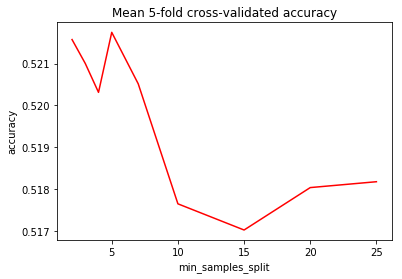

In [7]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Model fitting and sample testing

In [8]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.5211009174311927

### Final prediction

In [10]:
df_res = pd.DataFrame()
df_test_dropped = df_test.drop(['win'], axis=1)
df_res['ID'] = df_test_dropped['ID']
df_res['win'] = pd.Series(model.predict(df_test_dropped))
print(df_test_dropped.index)
df_res.head(10)
print(df_res)
np.count_nonzero(df_res['win']==df_test['win'])

RangeIndex(start=0, stop=10294, step=1)
           ID  win
0       92650   -1
1       92651    1
2       92652    1
3       92653    1
4       92654   -1
5       92655   -1
6       92656   -1
7       92657   -1
8       92658    1
9       92659   -1
10      92660    1
11      92661    1
12      92662    1
13      92663   -1
14      92664    1
15      92665   -1
16      92666    1
17      92667   -1
18      92668   -1
19      92669    1
20      92670   -1
21      92671    1
22      92672    1
23      92673    1
24      92674   -1
25      92675    1
26      92676    1
27      92677    1
28      92678   -1
29      92679   -1
...       ...  ...
10264  102914    1
10265  102915    1
10266  102916    1
10267  102917   -1
10268  102918   -1
10269  102919   -1
10270  102920   -1
10271  102921   -1
10272  102922   -1
10273  102923   -1
10274  102924    1
10275  102925   -1
10276  102926    1
10277  102927    1
10278  102928    1
10279  102929    1
10280  102930   -1
10281  102931    1
10282  102

5310

### Export

In [80]:
export_file_name = result_folder + "simple_dt.csv"
df_res.to_csv(export_file_name, index=False)

Easy Comparison
---------------------------

In [6]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

df_vars = df_train.loc[:, df_train.columns != 'win']
df_class = df_train['win']
# Adjust size here - Terminates in reasonable time for 10.000 elements and k<=40 attributes
# Won't terminate for 100.000
#df_vars=df_vars.head(5000)
#df_class=df_class.head(5000)
df_class[df_class<0] = 0
df_vars = np.where(df_vars < 0, 2, df_vars)

X, y = df_vars,df_class
#Adjust k attributes here
X_new = SelectKBest(chi2, k=50).fit_transform(X, y)
df_vars=X_new
X_train, X_test, y_train, y_test = train_test_split(X_new, df_class, test_size=test_set_ratio, random_state=0)

names = ["Nearest Centroid", #"Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    #SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

cl_scores = {}

for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, df_vars, df_class, cv=10, scoring='accuracy', return_train_score=True)
        cl_scores[name] = scores
        print(name,"-- Training Set --", "Mean", scores['train_score'].mean(), "-- Min", scores['train_score'].min(), "-- Max", scores['train_score'].max())
        print(name,"-- Test Set --", "Mean", scores['test_score'].mean(), "-- Min", scores['test_score'].min(), "-- Max", scores['test_score'].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()

Nearest Centroid -- Training Set -- Mean 0.5292630586897996 -- Min 0.5277687833543203 -- Max 0.5300657200422143
Nearest Centroid -- Test Set -- Mean 0.5264975646399133 -- Min 0.5221802482460874 -- Max 0.5316783594171614
Decision Tree -- Training Set -- Mean 0.9711015179494631 -- Min 0.9706182167056425 -- Max 0.9715652883047108
Decision Tree -- Test Set -- Mean 0.5190718105240378 -- Min 0.5108472746896924 -- Max 0.5279007015650297
Naive Bayes -- Training Set -- Mean 0.5294201599630315 -- Min 0.5287881513461654 -- Max 0.5301553037116987
Naive Bayes -- Test Set -- Mean 0.5284404696180282 -- Min 0.5237992444684296 -- Max 0.5342687533729088


In [7]:
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_score'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Dota2 results - Size 10000 - Kbestattributes=20")
    
py.iplot(go.Figure(data=traces, layout=layout))